In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
def xprime(x,y):
    return (a*x) + (b*x*y)
def yprime(x,y):
    return (c*y) + (e*x*y)
x0 = 199
y0 = 21
a = 0.222
b = -0.0011
c = -1.999
e = 0.010
h = .0001
t = 1
####
def findNext(x,y,h):
    xnew = x +h * xprime(x,y)
    ynew = y + h * yprime(x,y)
    return xnew,ynew
#q 1
def findstep(x0,y0,h,t):
    x=x0
    y=y0
    xvals = list()
    yvals = list()
    xvals.append(x)
    yvals.append(y)
    steps = (int)(t/h)
    for i in range(steps):
        x,y = findNext(x,y,h)
        xvals.append(x)
        yvals.append(y)
    return xvals,yvals

#####

xvals = findstep(x0,y0,h,t)[0]
yvals = findstep(x0,y0,h,t)[1]
print(xvals[-1])
print(yvals[-1])

242.40594839986807
25.69566491619684


In [55]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pylab as p
from numpy import *
x0 = 199
y0 = 21
a = 0.222
b = 0.0011
c = 1.999
d = 0.010
h = 0.0001
trange=11
#a = 1.
#b = 0.1
#c = 1.5
#d = 0.75
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*X[0]*X[1] ])

In [48]:
#!python
X_f0 = array([     0. ,  0.])
X_f1 = array([ 199.9, 201.818])
all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) # => True

False

In [59]:
#!python
from scipy import integrate
t = arange(0, trange+h,  h)              # time
X0 = array([x0, y0])  # initials conditions: 10 rabbits and 5 foxes
X = integrate.odeint(dX_dt, X0, t)
                    # >>> 'Integration successful.'

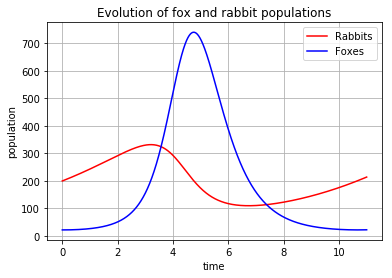

In [60]:
#!python
rabbits, foxes = X.T
f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Rabbits')
p.plot(t, foxes  , 'b-', label='Foxes')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of fox and rabbit populations')
f1.savefig('rabbits_and_foxes_1.png')

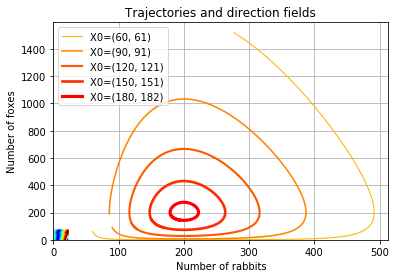

In [61]:
values  = linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = p.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
f2.savefig('rabbits_and_foxes_2.png')

In [62]:
#!python
def IF(X):
    u, v = X
    return u**(c/a) * v * exp( -(b/a)*(d*u+v) )
# We will verify that IF remains constant for different trajectories
for v in values:
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)
    I = IF(X.T)                                 # compute IF along the trajectory
    I_mean = I.mean()
    delta = 100 * (I.max()-I.min())/I_mean
    print ('X0=(%2.f,%2.f) => I ~ %.1f |delta = %.3G %%' % (X0[0], X0[1], I_mean, delta))
# >>> X0=( 6, 3) => I ~ 20.8 |delta = 6.19E-05 %
#     X0=( 9, 4) => I ~ 39.4 |delta = 2.67E-05 %
#     X0=(12, 6) => I ~ 55.7 |delta = 1.82E-05 %
#     X0=(15, 8) => I ~ 66.8 |delta = 1.12E-05 %
#     X0=(18, 9) => I ~ 72.4 |delta = 4.68E-06 %

X0=(60,61) => I ~ 8164718219230838003859456.0 |delta = 1.54E+03 %
X0=(90,91) => I ~ 1347034407798234322829312.0 |delta = 1.09E+03 %
X0=(120,121) => I ~ 307822360479572758102016.0 |delta = 769 %
X0=(150,151) => I ~ 91612447626383222374400.0 |delta = 499 %
X0=(180,182) => I ~ 42141402167872713654272.0 |delta = 205 %


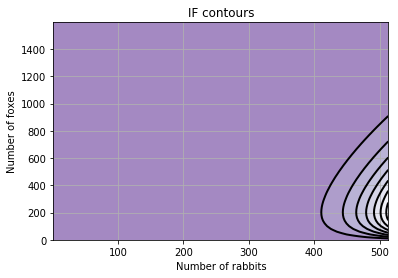

In [63]:
#!python
#-------------------------------------------------------
# plot iso contours
nb_points = 80                              # grid size
x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)
X2 , Y2  = meshgrid(x, y)                   # create the grid
Z2 = IF([X2, Y2])                           # compute IF on each point
f3 = p.figure()
CS = p.contourf(X2, Y2, Z2, cmap=p.cm.Purples_r, alpha=0.5)
CS2 = p.contour(X2, Y2, Z2, colors='black', linewidths=2. )
p.clabel(CS2, inline=1, fontsize=16, fmt='%.f')
p.grid()
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.ylim(1, ymax)
p.xlim(1, xmax)
p.title('IF contours')
f3.savefig('rabbits_and_foxes_3.png')
p.show()